## Using K-means clusterring to cluster datasets of customers receiving different offers of a wine marketing campaign and their acceptance of certain offers

**1. Import the required libraries**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

**2. Read the excel file first tab 'OfferInformation' containing the data of offers sent to customers and their different attributes**

In [52]:
df_read = pd.read_excel("WineKMC.xlsx",sheet_name='OfferInformation')

C:\Users\jayva\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [16]:
df_read

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


In [17]:
df_read.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


**3. Read the excel file second tab 'Transactions' containing the data on offers customers responded to, and what the customer ended up buying**

In [18]:
df_customer = pd.read_excel("WineKMC.xlsx",sheet_name='Transactions')
df_customer['n']=1

C:\Users\jayva\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [19]:
df_customer.head()

,Customer Last Name,Offer #,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


**4. Merged the data of offers and its attributes to the transaction data to see which customer got what offers and their respective attributes**

In [20]:
df_merged=pd.merge(df_customer,df_read,on="Offer #")

In [21]:
df_merged

,Customer Last Name,Offer #,n,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,Smith,2,1,January,Pinot Noir,72,17,France,False
1,Rodriguez,2,1,January,Pinot Noir,72,17,France,False
2,Martin,2,1,January,Pinot Noir,72,17,France,False
3,Jackson,2,1,January,Pinot Noir,72,17,France,False
4,Campbell,2,1,January,Pinot Noir,72,17,France,False
...,...,...,...,...,...,...,...,...,...
319,Hill,13,1,May,Merlot,6,43,Chile,False
320,Carter,13,1,May,Merlot,6,43,Chile,False
321,James,13,1,May,Merlot,6,43,Chile,False
322,Hughes,13,1,May,Merlot,6,43,Chile,False


**5. Construct a pivot with customer name in rows and all the offers in columns. '1' refers to customer responded to the offer, while "Nan" later replaced with '0' means no response**

In [22]:
df_pivot=df_merged.pivot_table(index=["Customer Last Name"], columns='Offer #',values='n')

In [23]:
df_pivot.head()

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bailey,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Baker,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [24]:
df_pivot.fillna(value=0,inplace=True)
df_pivot

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Wood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**6. Defined a variable 'x' with the data from the above pivot put in an array using numpy**

In [53]:
x=df_pivot.to_numpy()

In [45]:
x

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

**7. Import Kmeans (K-Means Cluster) to get the value of SS(Sum of Square) that measures the averaged distance of all the points within a cluster to the cluster centroid. 
Lower vaues of SS represents better clustering since it shows that points in the custers are close to their respective centroids**

In [31]:
from sklearn.cluster import KMeans

In [33]:
ks=range(2,11)

**8. Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster**

In [ ]:
inertias=[]
for k in ks:
    print(k)
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(x)
    inertias.append(model.inertia_)
    print(inertias)

**8. Construct a plot showing 'SS' for each 'K' and pick 'K' using this plot. A good model is one with "low inertia(SS) and low number of clusters ( K )"**

Text(0.5, 0, 'K')

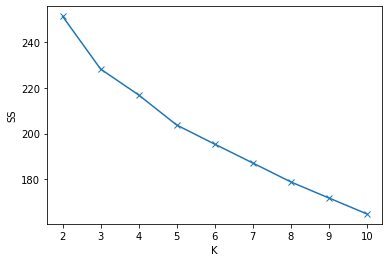

In [61]:
plt.plot(ks,inertias, '-x')
plt.ylabel('SS')
plt.xlabel('K')